In [4]:
%run ../services/imports.py
%run ../services/function.py
%run ../services/classifier_evaluation.py
%run ../services/visualization.py

In [5]:
visualizacao = Visualizacao()

In [6]:
import sys
import tensorflow

In [7]:
dataset = pd.read_csv('../dados/poscomp_frame.csv')

In [8]:
area = dataset.groupby('area_concentration').size().reset_index(name='counts')
labels = {'computacao': 'Computação', 'informatica':'Informática'}
area['area_concentration'].replace(labels, inplace=True)

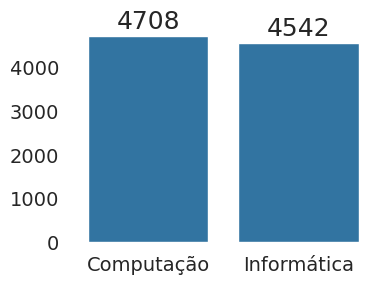

In [9]:
visualizacao.barplot_view(dataframe=area, x='area_concentration', y='counts', show_legend=False, 
                         figsize=(4,3), save_path="../imagens/quant_class_modelo1.pdf")

In [10]:
dataset['linhas_pesquisas'].value_counts()

linhas_pesquisas
inteligência artificial    2755
sistemas de computação     1953
Outros                     1832
engenharia de software     1737
redes de computadores       973
Name: count, dtype: int64

In [11]:
dataset = dataset.query("linhas_pesquisas != 'Outros'")

In [12]:
dataset

,sexo,estado,inscricao,especialidade,matemática discreta,cálculo diferencial e integral,álgebra linear,geometria analítica,análise combinatória,probabilidade e estatística,...,processamento de imagens,banco de dados,idade,regiao,matematica,fund_computacao,tec_computacao,total,linhas_pesquisas,area_concentration
1,M,RS,39401663587-8,metodologias e técnicas de computação,3,2,3,2,2,2,...,2,1,21,sul,16,22,12,50,engenharia de software,informatica
2,M,SP,39401651770-6,engenharia de software,0,1,1,1,0,0,...,2,1,25,sudeste,4,16,8,28,engenharia de software,informatica
3,M,PA,39401671273-0,sistemas de informação,1,0,1,1,0,0,...,1,0,30,norte,4,13,7,24,sistemas de computação,computacao
5,M,MS,39401670049-5,sistemas de computação,1,2,3,1,1,2,...,1,0,21,centro_oeste,12,20,11,43,sistemas de computação,computacao
6,M,PB,39401665284-9,metodologias e técnicas de computação,1,1,1,1,1,2,...,1,1,25,nordeste,9,17,11,37,engenharia de software,informatica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9245,F,SP,51801390716-5,ciência de dados,2,1,1,1,1,1,...,0,2,24,sudeste,7,9,6,22,inteligência artificial,computacao
9246,F,MG,51801394883-5,inteligência artificial,3,2,3,3,1,1,...,0,1,22,sudeste,14,16,8,38,inteligência artificial,computacao
9247,M,PB,51801395371-7,redes de computadores,1,1,2,2,0,2,...,1,1,48,nordeste,10,16,9,35,redes de computadores,informatica
9248,M,ES,51801396055-5,inteligência artificial,1,2,2,2,1,1,...,1,0,25,sudeste,10,16,6,32,inteligência artificial,computacao


In [13]:
X_dataset = dataset.loc[:,["idade",
        "sexo",
        "regiao",
        "estado",
        "matematica",
        "fund_computacao",
        "tec_computacao",
        "total",
        "area_concentration",]]

In [14]:
X_dataset['linhas_pesquisas'] = dataset.linhas_pesquisas
X_dataset['linhas_pesquisas'] = X_dataset['linhas_pesquisas'].astype('category')

In [15]:
X_dataset['linhas_pesquisas'].value_counts()

linhas_pesquisas
inteligência artificial    2755
sistemas de computação     1953
engenharia de software     1737
redes de computadores       973
Name: count, dtype: int64

In [16]:
# colunas_a_padronizar = ['matematica', 'fund_computacao', 'tec_computacao']
# scaler = StandardScaler()
# X_dataset[colunas_a_padronizar] = scaler.fit_transform(X_dataset[colunas_a_padronizar])

In [17]:
def encode_categorical_columns(df, columns):
    le = LabelEncoder()
    for col in columns:
        df[col] = le.fit_transform(df[col])
    return df

categorical_columns = ["linhas_pesquisas", 'sexo', 'regiao','estado', 'area_concentration']
X_dataset = encode_categorical_columns(X_dataset, categorical_columns)

In [18]:
X_dataset

,idade,sexo,regiao,estado,matematica,fund_computacao,tec_computacao,total,area_concentration,linhas_pesquisas
1,21,1,4,22,16,22,12,50,1,0
2,25,1,3,25,4,16,8,28,1,0
3,30,1,2,13,4,13,7,24,0,3
5,21,1,0,11,12,20,11,43,0,3
6,25,1,1,14,9,17,11,37,1,0
...,...,...,...,...,...,...,...,...,...,...
9245,24,0,3,25,7,9,6,22,0,1
9246,22,0,3,10,14,16,8,38,0,1
9247,48,1,1,14,10,16,9,35,1,2
9248,25,1,3,7,10,16,6,32,0,1


In [19]:
X = X_dataset.drop(['linhas_pesquisas'], axis=1)
y = X_dataset['linhas_pesquisas'].values

In [20]:
X 

,idade,sexo,regiao,estado,matematica,fund_computacao,tec_computacao,total,area_concentration
1,21,1,4,22,16,22,12,50,1
2,25,1,3,25,4,16,8,28,1
3,30,1,2,13,4,13,7,24,0
5,21,1,0,11,12,20,11,43,0
6,25,1,1,14,9,17,11,37,1
...,...,...,...,...,...,...,...,...,...
9245,24,0,3,25,7,9,6,22,0
9246,22,0,3,10,14,16,8,38,0
9247,48,1,1,14,10,16,9,35,1
9248,25,1,3,7,10,16,6,32,0


In [21]:
# Divisão dos dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# Normalização dos dados
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
X_train.shape

(5192, 9)

In [24]:
X_test

array([[ 2.02445508,  0.45175395, -1.81124754, ...,  0.42679153,
        -0.66917023, -0.75090307],
       [ 0.97700662,  0.45175395,  0.43761589, ..., -0.33942618,
        -0.40280523,  1.3317298 ],
       [ 2.19902983,  0.45175395,  0.43761589, ...,  0.80990039,
         0.66265475, -0.75090307],
       ...,
       [-0.2450166 ,  0.45175395,  1.18723703, ..., -1.48875275,
         0.52947225, -0.75090307],
       [-0.76874083,  0.45175395, -0.31200526, ...,  1.19300924,
         1.46174974, -0.75090307],
       [-0.94331557, -2.21359436,  1.18723703, ..., -1.10564389,
        -0.26962273,  1.3317298 ]])

In [35]:
import tensorflow as tf
import keras
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler

# Definindo a arquitetura da CNN para dados tabulares
model = models.Sequential()
# model.add(layers.Conv2D(32, (1, 3), activation='relu', input_shape=(1, X_train_scaled.shape[1], 1)))
# model.add(layers.MaxPooling2D((1, 2)))
# model.add(layers.Flatten())
model.add(layers.Dense(X_train.shape[1], activation='sigmoid', input_shape=(9,)))
model.add(layers.Dense(X_train.shape[1], activation='sigmoid'))
model.add(layers.Dense(X_train.shape[1], activation='sigmoid'))
model.add(layers.Dense(X_train.shape[1], activation='sigmoid'))
model.add(layers.Dense(4, activation='sigmoid'))

# Treinando o modelo
# model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))


In [36]:
X_train.shape

(5192, 9)

In [39]:
y_train.shape

(5192,)

In [38]:
# Compilando o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

Epoch 1/100


ValueError: in user code:

    File "/home/jean/anaconda3/envs/poscomp/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/home/jean/anaconda3/envs/poscomp/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/jean/anaconda3/envs/poscomp/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/home/jean/anaconda3/envs/poscomp/lib/python3.11/site-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/jean/anaconda3/envs/poscomp/lib/python3.11/site-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/home/jean/anaconda3/envs/poscomp/lib/python3.11/site-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/jean/anaconda3/envs/poscomp/lib/python3.11/site-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/jean/anaconda3/envs/poscomp/lib/python3.11/site-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/jean/anaconda3/envs/poscomp/lib/python3.11/site-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/home/jean/anaconda3/envs/poscomp/lib/python3.11/site-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 4) are incompatible
